In [1]:
import numpy as np

# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

# para cómputo simbólico
from sympy import *
init_printing()

x, y = symbols('x y')

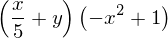

In [2]:
f = (y + (x/5)) * (1 - x**2)
f

In [3]:
g = -x*(1-y**2)
g

In [18]:
F = lambdify((x,y), f)
G = lambdify((x,y), g)

In [19]:
def step(x, y, dt, f, g):
    return (x + dt * f(x, y),
             y + dt * g(x, y))

def trayectoria(x0, y0, f, g, dt=0.01, steps=100):
    x = x0
    y = y0
    t = list()
    for n in range(steps):
        t.append((x, y))
        x, y = step(x, y, dt, f, g)
    return t

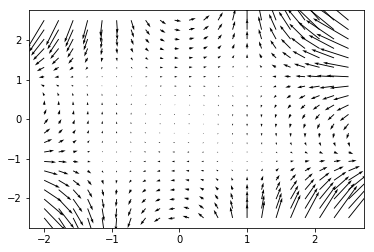

In [116]:
i, j = np.meshgrid(np.linspace(-2, 2.5, 22),
                   np.linspace(-2.5, 2.5, 22))

u = F(i, j)
v = G(i, j)

plt.quiver(i, j, u, v)

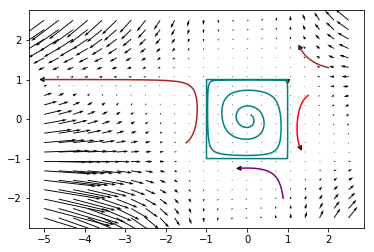

In [113]:
i, j = np.meshgrid(np.linspace(-5, 2.5, 22),
                   np.linspace(-2.5, 2.5, 22))

u = F(i, j)
v = G(i, j)

plt.quiver(i, j, u, v)

x0 = 0.1
y0 = 0.1
dt = 0.1
steps = 600
x, y = zip(*[coord
           for coord in
           trayectoria(x0, y0, F, G, dt, steps)])
plt.plot(x, y, color='teal')
plt.arrow(x[-2], y[-2],
          x[-1] - x[-2], y[-1] - y[-2],
          fc="teal", head_width=0.1, head_length=0.1)

x0 = 1.5
y0 = 0.6
dt = 0.002
x, y = zip(*[coord
           for coord in
           trayectoria(x0, y0, F, G, dt, steps)])
plt.plot(x, y, color='red')
plt.arrow(x[-2], y[-2],
          x[-1] - x[-2], y[-1] - y[-2],
          fc="red", head_width=0.1, head_length=0.1)

x0 = -1.5
y0 = -0.6
dt = 0.01
x, y = zip(*[coord
           for coord in
           trayectoria(x0, y0, F, G, dt, steps)])
plt.plot(x, y, color='firebrick')
plt.arrow(x[-2], y[-2],
          x[-1] - x[-2], y[-1] - y[-2],
          fc="firebrick", head_width=0.1, head_length=0.1)

x0 = 0.89
y0 = -2
dt = 0.002
x, y = zip(*[coord
           for coord in
           trayectoria(x0, y0, F, G, dt, steps)])
plt.plot(x, y, color='purple')
plt.arrow(x[-2], y[-2],
          x[-1] - x[-2], y[-1] - y[-2],
          fc="purple", head_width=0.1, head_length=0.1)

x0 = 2
y0 = 1.3
dt = 0.0004
x, y = zip(*[coord
           for coord in
           trayectoria(x0, y0, F, G, dt, steps)])
plt.plot(x, y, color='brown')
plt.arrow(x[-2], y[-2],
          x[-1] - x[-2], y[-1] - y[-2],
          fc="brown", head_width=0.1, head_length=0.1)

In [5]:
F(-5, 1), G(-5, 1)

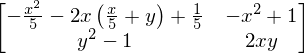

In [6]:
J = symbols("J")

J = Matrix([[diff(f, x), diff(f, y)], 
            [diff(g, x), diff(g, y)]])
J

In [7]:
puntos = []
X = 0
Y = 0
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [8]:
X = 5
Y = -1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [9]:
X = -5
Y = 1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [10]:
X = 1
Y = 1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [11]:
X = -1
Y = -1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [12]:
X = -1
Y = 1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

In [13]:
X = 1
Y = -1
puntos.append((J.trace().subs({x: X, y:Y}), J.det().subs({x: X, y:Y})))

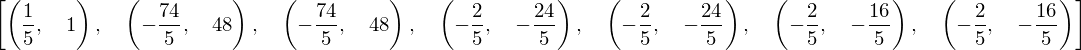

In [14]:
puntos

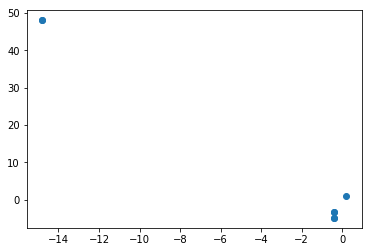

In [15]:
plt.scatter([p[0] for p in puntos], [p[1] for p in puntos])